In [1]:
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
df=pd.read_csv('crime_data1.csv')

In [3]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236.0,58.0,21.2
1,Alaska,10.0,NaN,48.0,44.5
2,Arizona,8.1,294.0,80.0,31.0
3,Arkansas,8.8,190.0,NaN,19.5
4,California,9.0,276.0,91.0,40.6


In [4]:
murder_mean=df.Murder.mean()

In [5]:
#df.Murder=df.Murder.fillna(value=murder_mean)

In [6]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236.0,58.0,21.2
1,Alaska,10.0,NaN,48.0,44.5
2,Arizona,8.1,294.0,80.0,31.0
3,Arkansas,8.8,190.0,NaN,19.5
4,California,9.0,276.0,91.0,40.6


In [7]:
Assault_mean=df.Assault.mean()

In [8]:
#df.Assault=df.Assault.fillna(value=Assault_mean)

In [9]:
#df[df.Assault.isnull()]

In [10]:
UrbanPop_mean=df.UrbanPop.mean()

In [11]:
#df.UrbanPop=df.UrbanPop.fillna(value=UrbanPop_mean)

In [12]:
#df.UrbanPop.fillna(value=UrbanPop_mean)

In [13]:
#df[df.UrbanPop.isnull()]

In [14]:
Rape_mean=df.Rape.mean()

In [15]:
#df.Rape=df.Rape.fillna(value=Rape_mean)

In [16]:
df[df.Rape.isnull()]

,State,Murder,Assault,UrbanPop,Rape
10,Hawaii,5.3,46.0,83.0,NaN
43,Utah,3.2,120.0,80.0,NaN
46,Washington,4.0,145.0,73.0,NaN


In [17]:
values={'Murder':murder_mean,'Assault':Assault_mean,'UrbanPop':UrbanPop_mean,'Rape':Rape_mean}

In [18]:
df=df.fillna(value=values).round(2)

In [19]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236.00,58.00,21.2
1,Alaska,10.0,166.28,48.00,44.5
2,Arizona,8.1,294.00,80.00,31.0
3,Arkansas,8.8,190.00,65.57,19.5
4,California,9.0,276.00,91.00,40.6


In [20]:
Y=df[['Murder']]

In [21]:
import numpy as np
X=np.array(range(0,50))

In [22]:
X.shape=(50,1)

# Finding number of cluster

In [23]:
Nc=range(1,20)


In [24]:
kmeans=[KMeans(n_clusters=i) for i in Nc]

In [25]:
scores=[kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]

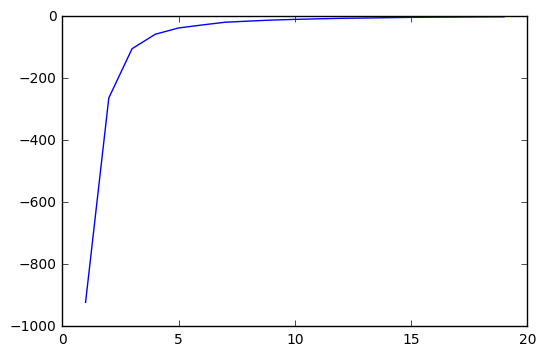

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(Nc,scores)


In [27]:
plt.show()

Number of cluster k=3 from the above elbow graph
Now devise PCA and Kmeans algorithms

In [28]:
kmean=KMeans(n_clusters=3)

In [29]:
kmeanoutput=kmean.fit(Y)

In [30]:
kmeanoutput

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
kmeanoutput.labels_

array([2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1,
       2, 0, 0, 1, 2, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 1, 0,
       1, 0, 1, 0], dtype=int32)

In [32]:
pca=PCA(n_components=1).fit(Y)

In [33]:
pca_d=pca.transform(Y)

In [34]:
pca_c=pca.transform(X)

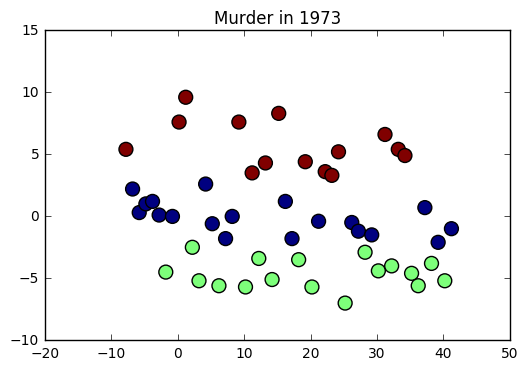

In [37]:
#plt.rcParams['figure.figsize']=[30,6]
plt.title('Murder in 1973')
plt.scatter(pca_c[:,0],pca_d[:,0],c=kmeanoutput.labels_ ,s=100)

In [38]:
Y1=df[['Assault']]

In [40]:
X=np.array(range(0,50))

In [41]:
X.shape=(50,1)

In [47]:
Nc1=range(1,20)
kmeans1=[KMeans(i) for i in Nc1]
score=[kmeans1[i].fit(Y).score(Y) for i in range(len(kmeans1))]

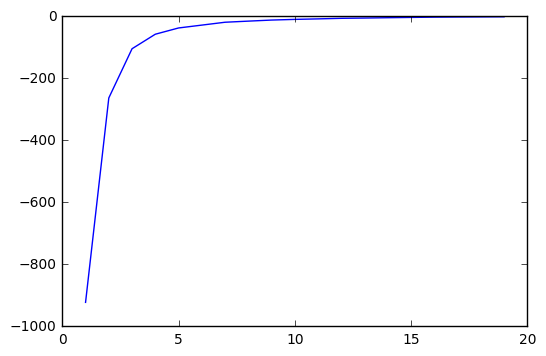

In [48]:
plt.plot(Nc1,score)

In [55]:
kmean1=KMeans(n_clusters=3)
kmeanoutput1=kmean1.fit(Y1)

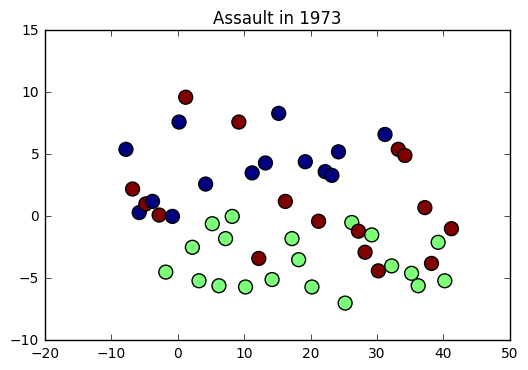

In [59]:
pca1=PCA(n_components=1).fit(Y)
pca_d=pca1.transform(Y)
pca_c=pca1.transform(X)
plt.title('Assault in 1973')
plt.scatter(pca_c[:,0],pca_d[:,0],c=kmeanoutput1.labels_,s=100)